# Revisão: Transformadas de Fourier

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Série de Fourier

### Função Periódica




- Seja uma função periódica $f(x)$ de período $T,$ o que significa que $f(x) = f(x+T) \space \forall \space x$ .
***

#### Código: Sinal Periódico

Vamos gerar um sinal quadrado, periódico, com período T = 2s

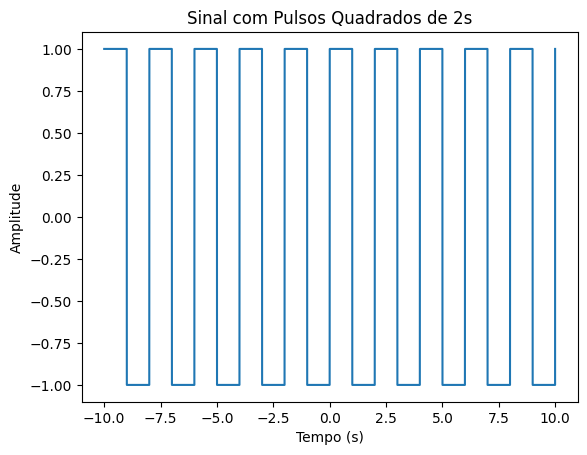

In [10]:
N = 20000 # Número de pontos -> deve ser grande para "gerar um sinal contínuo"
tmax = 10 # Tempo máximo
tmin = -10 # Tempo mínimo

t = np.linspace(tmin, tmax, N)
sinal = signal.square(2 * np.pi * 0.5 * t)

plt.plot(t, sinal)
plt.title('Sinal com Pulsos Quadrados de 2s')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

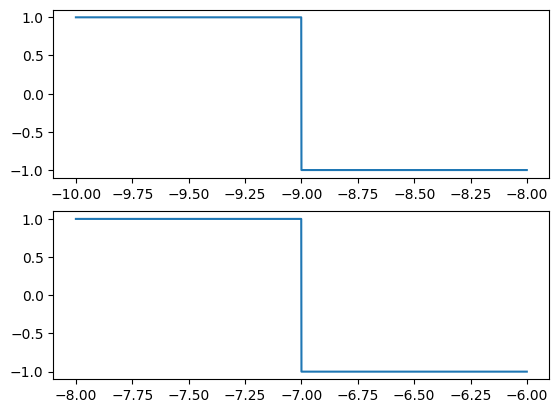

In [11]:
# MOSTRANDO A PERIODICIDADE DO SINAL
plt.subplot(211)
plt.plot(t[0:2000], sinal[0:2000])
plt.subplot(212)
plt.plot(t[2000:4000], sinal[2000:4000])

Ou seja, a cada 2000 amostras (= 2.0s), o sinal se repete

### Coeficientes da Série de Fourier



- Foi descoberto que uma função periódica pode ser escrita como uma combinação linear de senos e cossenos com diferentes frequências, sendo elas harmônicos da frequência de base da função $(2\pi/T)$,  na forma:

$$f(x) = \frac{a_0}{2}+\sum_{n=1}^\infty\left[a_n \cdot \cos \left(\frac{2n\pi x}{T}\right)+ b_n \cdot \sin \left(\frac{2n\pi x}{T}\right)\right]$$

- Os coeficientes $a_n$ e $b_n$ são chamamos **coeficientes de Fourier** da série e são dados por:

$$
a_0 = \frac{2}{T}\int_T f(x)dx
$$

$$
a_n = \frac{2}{T}\int_Tf(x) \cdot \cos \left(\frac{2n\pi x}{T}\right) dx
$$

$$
b_n = \frac{2}{T}\int_Tf(x) \cdot \sin\left(\frac{2n\pi x}{T}\right) dx
$$

Para que isso seja possível, basta que a função seja absolutamente integral, tenha um número finito de descontinuidades e também de máximos e mínimos no intervalo do período considerado.

***

#### Código: Coefs. SF

Nossa função é periódica com período = 2. Podemos integrar em torno de qualquer ponto. 

Escolheremos integrar em volta de 0.

Idealmente, faríamos uma integral, mas como estamos trabalhando com python, a "integral" é na verdade uma soma de trapézios (usaremos então a função np.trapz, que faz essa soma/integral)

Text(0, 0.5, 'Amplitude')

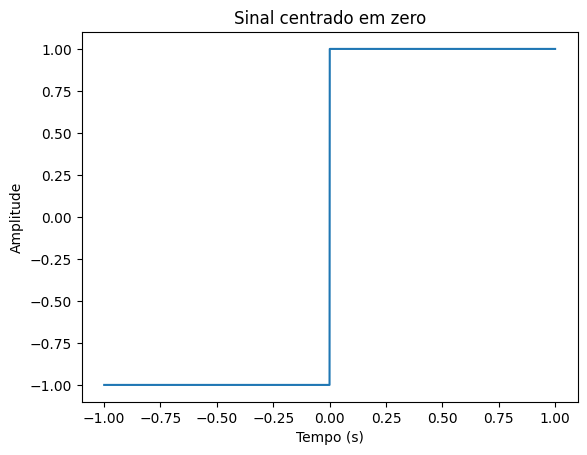

In [12]:
T = 2 # Período do sinal

sinal_em_volta_de_zero = sinal[9000:11000]
t_em_volta_de_zero = t[9000:11000]

plt.plot(t_em_volta_de_zero, sinal_em_volta_de_zero)
plt.title('Sinal centrado em zero')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

In [13]:
a0 = 2 / T * np.trapz(sinal_em_volta_de_zero, t_em_volta_de_zero)

print('a0 =', a0)

a0 = 0.0


a0 = 0, como era de se esperar, pois, a0 representa a média do sinal

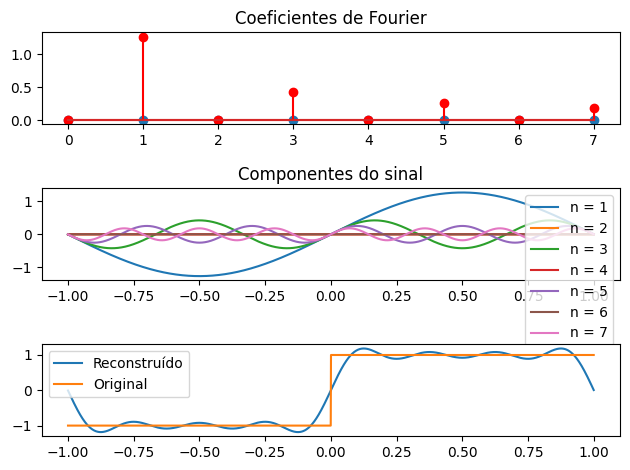

In [14]:
# Vamos calcular os primeiros P coeficientes de Fourier (Mude esse fator livremente)
P = 8

an = np.zeros(P)
bn = np.zeros(P)

for n in range(1, P):
    # a[n] = 2 / T * int(sinal(t) * cos(2 * pi * n / T * t) dt)
    an[n] = 2 / T * np.trapz(sinal_em_volta_de_zero * np.cos(2 * np.pi * n / T * t_em_volta_de_zero), t_em_volta_de_zero)
    bn[n] = 2 / T * np.trapz(sinal_em_volta_de_zero * np.sin(2 * np.pi * n / T * t_em_volta_de_zero), t_em_volta_de_zero)


plt.subplot(311)
plt.stem(an)
plt.stem(bn, 'r', markerfmt='ro')
plt.title('Coeficientes de Fourier')

plt.subplot(312)
plt.title('Componentes do sinal')
sinal_reconstruido = np.zeros_like(sinal_em_volta_de_zero)
sinal_reconstruido += a0 / 2
for n in range(1, P):
    sinal_n = an[n] * np.cos(2 * np.pi * n / T * t_em_volta_de_zero) + bn[n] * np.sin(2 * np.pi * n / T * t_em_volta_de_zero)
    plt.plot(t_em_volta_de_zero, sinal_n, label='n = ' + str(n))
    sinal_reconstruido += sinal_n
plt.legend()

plt.subplot(313)
plt.plot(t_em_volta_de_zero, sinal_reconstruido, label='Reconstruído')
plt.plot(t_em_volta_de_zero, sinal_em_volta_de_zero, label='Original')
plt.legend()
plt.tight_layout()
plt.show()

### Formulação Complexa



- A base da formulação complexa da série de Fourier está na fórmula de Euler, que diz que:

$$
e^{in\theta} = \cos (n\theta) + i \sin (n\theta)
$$

- Na formulação da série de Fourier aparece a soma de um seno e um cosseno de um mesmo argumento, multiplicados por coeficientes. Queremos uma forma de transformar essa formulação na soma de coeficientes complexos vezes exponenciais complexas.

- Vamos começar fazendo:

$$
c_n = a_n -ib_n
$$
$$
c_n\cdot e^{in\theta} = a_n \cos (n\theta) + a_n i\sin(n\theta)- ib_n \cos (n\theta) + b_n \sin(n\theta)
$$

- Com esse chute inicial, temos os dois termos que precisamos na formulação (1ª e 4ª parcelas). Porém temos parcelas complexas que não estamos interessados. Para poder eliminá-los, vamos introduzir coeficientes $c_{-n}$ que agora consideram valores negativos de $n$. Lembrando que $\cos (n\theta) = \cos (-n\theta)$  e que $\sin(-n\theta) = -\sin (n\theta)$, definimos:

$$
c_{-n}=a_n+ib_n
$$
$$
c_{-n}\cdot e^{-in\theta} = a_n \cos (n\theta) - a _n i \sin(n\theta ) +ib_n \cos(n\theta) + b_n \sin (n\theta)
$$

- Veja que agora ao somar ambas as expansões, obtemos:

$$
c_n \cdot e^{in\theta} + c_{-n}\cdot e^{-in\theta} = 2 a_n \cos (n\theta) + 2b_n \sin(n\theta)
$$

- Para finalmente obter a forma desejada, precisamos dividir os coeficientes por 2. Assim, temos a forma final:

$$
c_{\pm n} =\frac{a_n \mp ib_n}{2}
$$

- E a forma complexa da série de Fourier de uma função passa a ser dada por:

$$
f(x) = \sum_{n=-\infty}^{+\infty}c_n\cdot e^{in\omega_ox}
$$

- Onde $\omega_o=2\pi/T$.

- Observamos também que:

$$
c_n = \frac{a_n -ib_n}{2} = \frac{1}{T}\int_T f(x) \cdot \left[\cos(n\omega_ox) -i\sin(n\omega_ox)\right] dx\\\space \\= \frac{1}{T}\int_T f(x) \cdot \left[\cos(-n\omega_ox) +i\sin(-n\omega_ox)\right] dx \\ \therefore \\ c_n = \frac{1}{T}\cdot \int_Tf(x)\cdot e^{-in\omega_ox}dx
$$

- O que completa a formulação complexa desejada.

- Chamamos $n$ de harmônicos da série, e eles representam quantas vezes a frequência fundamental da função $\omega_o = \frac{2\pi}{T}$ está sendo multiplicada.

#### Código: Coeficientes Complexos

c0 = [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.27323865e+00j
 -2.77555756e-17-2.84342194e-06j  1.38777878e-17-4.24410487e-01j
 -2.77555756e-17-5.68682144e-06j -1.38777878e-17-2.54643419e-01j
 -2.08166817e-17-8.53017602e-06j -6.93889390e-18-1.81885077e-01j]


<StemContainer object of 3 artists>

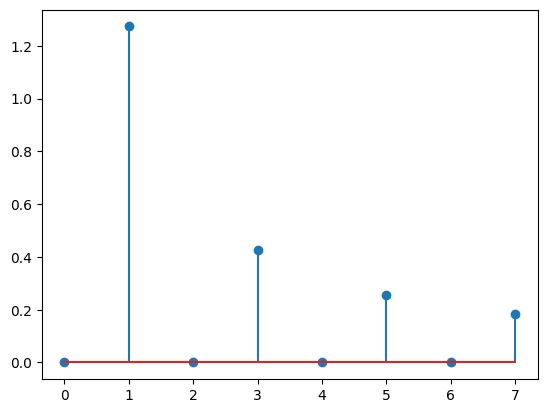

In [15]:
P = 8

cn = np.zeros(P, dtype=complex)

for i in range(P):
    cn[i] = 2 / T * np.trapz(sinal_em_volta_de_zero * np.exp(-1j * t_em_volta_de_zero * i * 2 * np.pi / T), t_em_volta_de_zero)

print('c0 =', cn)

plt.stem(np.abs(cn))

## Transformada de Fourier (FT)

- Dado que uma função periódica pode ser escrita como uma soma de senos e cossenos, podemos desenvolver o conceito de dois **domínios** para uma função, em geral para sinais:

    - **Domínio do Tempo:** descreve a amplitude do sinal em função do tempo.
    
    - **Domínio da Frequência:** descreve a amplitude do sinal em função de cada frequência de senos e cossenos que o compõe.

- Como na área de processamento de sinais conhecer as frequências que compõem um sinal é importante, é natural querer desenvolver uma ferramenta que possa fazer a conversão entre os dois domínios.

- Até o momento, a **Série de Fourier** cumpre esse propósito, já que possuímos uma fórmula para descrever a amplitude de cada frequência múltipla da frequência fundamental $n\omega_o$ e também uma fórmula para reconstruir o sinal no domínio do tempo conhecendo esses coeficientes. Contudo, a série funciona apenas para sinais periódicos de período definido.

- Porém, no mundo real, os sinais raramente são periódicos. Assim, precisamos desenvolver uma ferramenta que faça a conversão entre os dois domínios para sinais finitos e aperiódicos.

- Para desenvolver essa ferramenta, vamos partir das equações de síntese (frequência → tempo) e análise (tempo → frequência) da série de Fourier para sinais periódicos.

$$
c_n = \frac{1}{T}\cdot \int_Tf(t)\cdot e^{-in\omega_ot}dt
$$

$$
f(t) = \sum_{n=-\infty}^{+\infty}c_n\cdot e^{in\omega_ot}
$$

- Vamos também definir algumas variáveis auxiliares:
    - $\omega= \frac{2\pi n}{T} = n\omega_o$
    - $\delta \omega = \frac{2\pi}{T}=\omega_o$
    - $F(\zeta) = \int_Tf(t) \cdot e^{-i\zeta t}dt$

- Dessa forma, podemos redefinir as equações de síntese e análise como:

$$
c_n = \frac{1}{T}\cdot F(\omega)
$$

$$
f(t) = \sum_{n=-\infty}^{+\infty} \frac{F(\omega)}{T}\cdot e^{i\omega t}
$$

- Mas $1/T = \delta \omega/2\pi$

$$
f(t)= \frac{1}{2\pi}\sum_{n=-\infty}^{+\infty} F(\omega)\cdot e^{i\omega t} \cdot \delta \omega
$$

- Por enquanto apenas reescrevemos nossa série de Fourier. A ideia que irá retornar a transformada de Fourier surge da consideração de que **uma função aperiódica possui período $T\to \infty$,** de forma que $\delta \omega \to 0.$ Assim, no limite considerado, a soma infinita se torna uma integral na forma:

$$
f(t) = \frac{1}{2\pi} \cdot \int_{-\infty}^{+\infty}F(\omega)\cdot e^{i\omega t} \space d\omega
$$

- Ou seja, agora $F(\omega)$ é uma função contínua em termos da frequência $\omega.$

- Essa é a equação de síntese, enquanto a equação de análise surge da própria definição que adotamos, considerando agora o período infinito:

$$
F(\omega) = \int_{-\infty}^{+\infty}f(t)\cdot e^{-i\omega t}dt
$$

- É importante notar que desde o começo trabalhamos com a notação complexa, o que significa que $F(\omega)$ é uma função complexa, de modo que carrega informações sobre a **amplitude e fase** de cada frequência que compõe o sinal.

$$
F(\omega) = |F(\omega)| \cdot e^{\angle F(\omega)} = |F(\omega)|\cdot [\cos (\angle F(\omega)) + i \sin (\angle F(\omega))]
$$

- Vale lembrar que:

$$
|F(\omega) | = \sqrt{\Re\{F(\omega)\}^2+\Im\{F(\omega)\}^2} 
$$

$$
\angle F(\omega) = \tan^{-1} \frac{\Im\{F(\omega)\}}{\Re\{F(\omega)\}}
$$



## Propriedades da TF

### Linearidade

Não funcionou muito bem... haha

C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Vitor\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


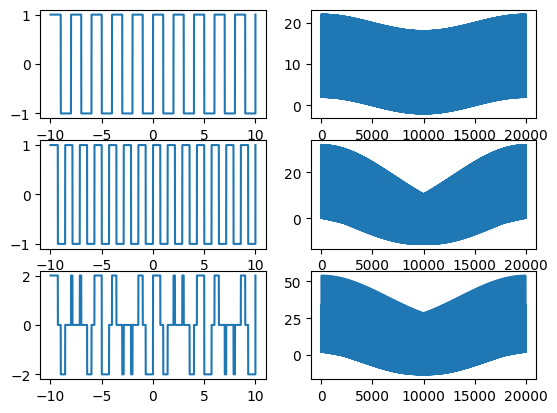

In [16]:
# Mostrando Linearidade da Transformada de Fourier
sinal1 = signal.square(2 * np.pi * 0.5 * t)
sinal2 = signal.square(2 * np.pi * 0.7 * t)

sinal_soma = sinal1 + sinal2

transf_fourier_sinal1 = np.fft.fft(sinal1)
transf_fourier_sinal2 = np.fft.fft(sinal2)
transf_fourier_soma = np.fft.fft(sinal_soma)

plt.subplot(321)
plt.plot(t, sinal1, label='Sinal 1')
plt.subplot(322)
plt.plot(transf_fourier_sinal1, label='Transformada de Fourier do Sinal 1')
plt.subplot(323)
plt.plot(t, sinal2, label='Sinal 2')
plt.subplot(324)
plt.plot(transf_fourier_sinal2, label='Transformada de Fourier do Sinal 2')
plt.subplot(325)
plt.plot(t, sinal_soma, label='Soma')
plt.subplot(326)
plt.plot(transf_fourier_soma, label='Transformada de Fourier da Soma')
plt.show()
